In [2]:
# Load Imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


import os
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import *
from data_generator import DataGenerator



%load_ext autoreload
%autoreload 2

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
### Load packages ###
import matplotlib.pyplot as plt
from scipy import stats
import nibabel as nib
import numpy as np
import os

### Aux. Functions ###
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask

%matplotlib inline





In [23]:
# Data path
data_fp = '../data/'
# Params for generators
params = {'dim': (256,256,256),
          'batch_size': 1,
          'n_channels': 1,
          'shuffle' : True}

## Load side data ##
(x_train, y_train, _, _, _, _) =load_partitioned_data(data_fp, split=(0.2, 0.2, 99.6))



Number of img(s) in training generator  1
img:  1
name :  ../data//IXI206-HH-1650-T1.nii.gz


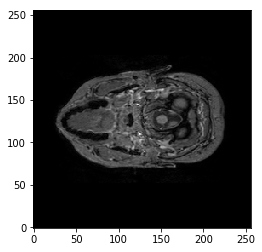

In [27]:
# ../data//IXI206-HH-1650-T1.nii.gz
training_generator = DataGenerator(x_train, y_train, **params)

print('Number of img(s) in training generator ', len(training_generator))
for img in training_generator:
    if training_generator.index > len(training_generator):
        break
    print('img: ', training_generator.index)
    print('name : ', training_generator.list_IDs[training_generator.index-1])
    slice = (img[0][:,:,75])[0, :, :]
    show_slice(slice)
    plt.show()
